### Installing YOLO 8

In [1]:
!pip install ultralytics

In [2]:
#checking if it's installed or not

import ultralytics
ultralytics.checks()

Ultralytics 8.3.230 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.8/112.6 GB disk)


### Importing Dataset: From RoboFlow

In [3]:
# Storing Data in Specific Directory

%pwd  #To check present directory

'/content'

In [4]:
# Creating directory in content

!mkdir ObjectDetection

mkdir: cannot create directory ‘ObjectDetection’: File exists


In [5]:
# checking directory

!ls

ObjectDetection


In [6]:
# creating current working directory

import os
os.chdir("/content/ObjectDetection")

In [7]:
%pwd

'/content/ObjectDetection'

In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Rx4b0zkT5Yf3yXVxzwSv")
project = rf.workspace("sky-zfxvm").project("coco-yrx1j")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


### Training YOLOv8

In [9]:
os.chdir("/content/ObjectDetection/COCO-1")

In [10]:
!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=10 imgsz=640 batch=16

Ultralytics 8.3.230 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tru

# Displaying the results we obtained

In [13]:
!ls '/content/ObjectDetection/COCO-1/runs/detect/train/'

args.yaml			 labels.jpg		val_batch0_pred.jpg
BoxF1_curve.png			 results.csv		val_batch1_labels.jpg
BoxP_curve.png			 results.png		val_batch1_pred.jpg
BoxPR_curve.png			 train_batch0.jpg	val_batch2_labels.jpg
BoxR_curve.png			 train_batch1.jpg	val_batch2_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg	weights
confusion_matrix.png		 val_batch0_labels.jpg


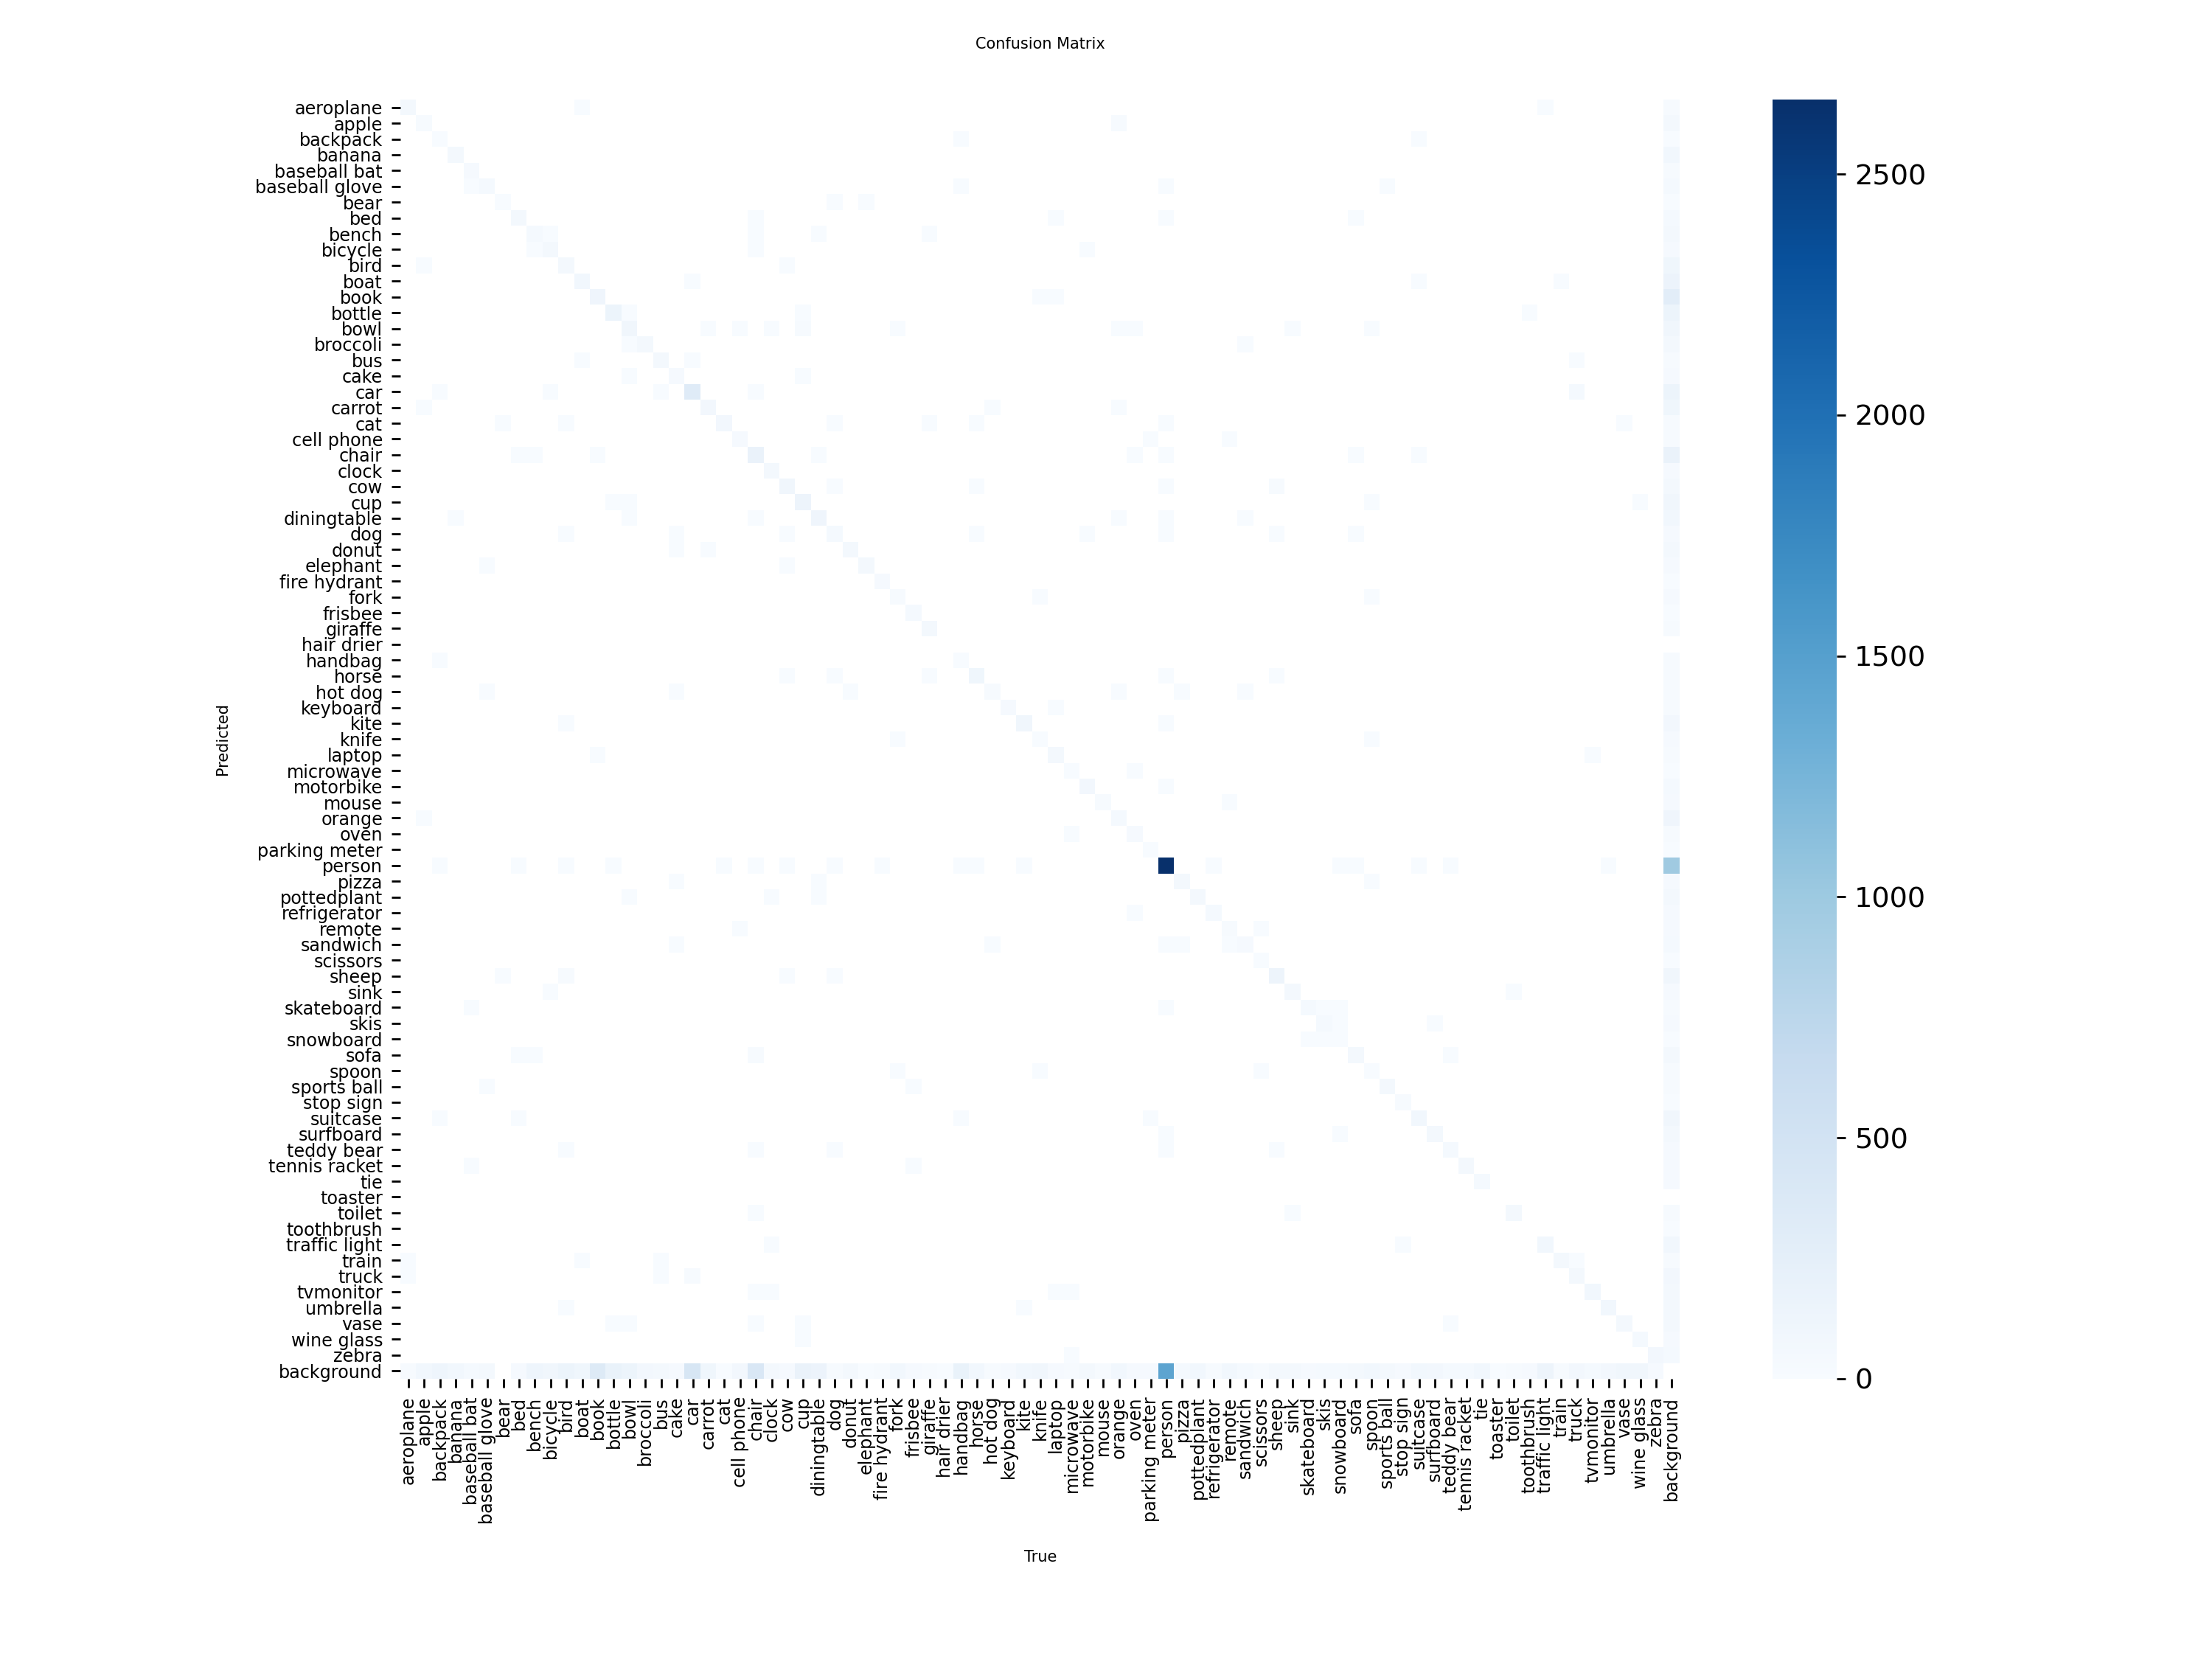

In [15]:
resultData = "/content/ObjectDetection/COCO-1/runs/detect/train/"

from IPython.display import Image, display

Image(filename = f'{resultData}confusion_matrix.png')

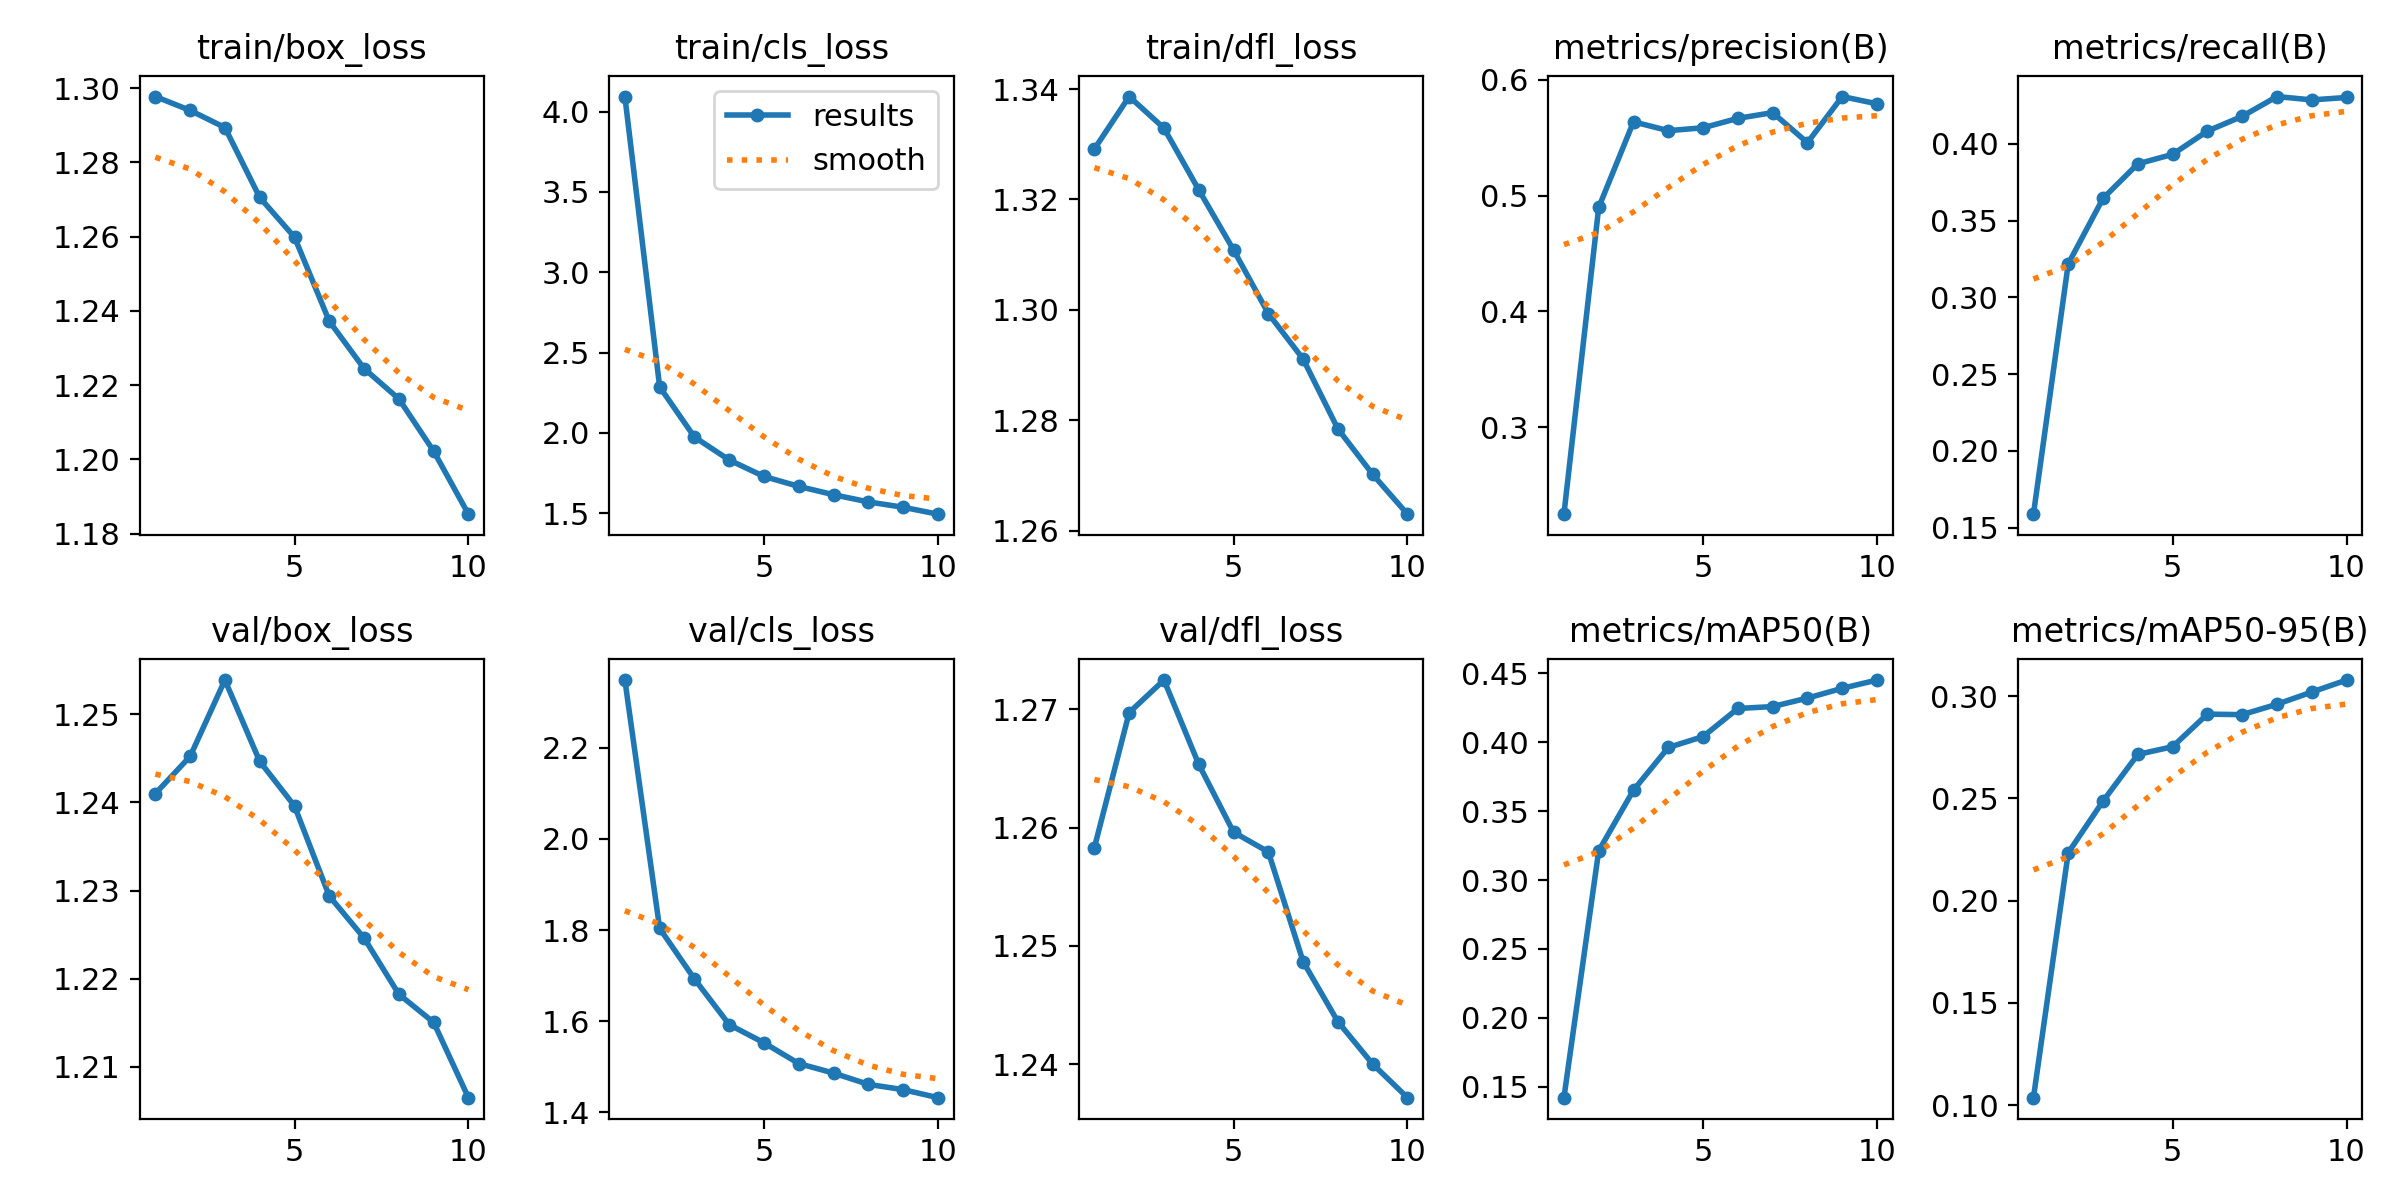

In [16]:
Image(filename = f'{resultData}results.png')

In [17]:
import pandas as pd

df = pd.read_csv(f'{resultData}results.csv')
print(df.head())


   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  134.690         1.29774         4.09308         1.32916   
1      2  261.950         1.29401         2.28635         1.33866   
2      3  388.773         1.28939         1.97407         1.33293   
3      4  516.360         1.27056         1.83113         1.32175   
4      5  644.262         1.25987         1.72882         1.31086   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.22503            0.15884           0.14207   
1               0.48980            0.32194           0.32122   
2               0.56371            0.36455           0.36520   
3               0.55607            0.38704           0.39615   
4               0.55855            0.39323           0.40407   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.10359       1.24101       2.34820       1.25832  0.000040   
1              0.22345       1.24523       1

# Testing Model

In [31]:
%pwd

'/content'

In [30]:
os.chdir("/content")

In [32]:
!mkdir ManualTestData

In [34]:
os.chdir("/content/ManualTestData")

In [35]:
%pwd

'/content/ManualTestData'

In [36]:
url = "https://drive.google.com/file/d/1eibs6WZxuZAL4qL1uiP7hw2-exDsOK1G/view?usp=sharing"

id='1eibs6WZxuZAL4qL1uiP7hw2-exDsOK1G'

!wget --no-check-certificate 'https://docs.google.com/uc?export=downloads&id=1eibs6WZxuZAL4qL1uiP7hw2-exDsOK1G' -O InputVideo1.mp4

--2025-11-23 07:34:02--  https://docs.google.com/uc?export=downloads&id=1eibs6WZxuZAL4qL1uiP7hw2-exDsOK1G
Resolving docs.google.com (docs.google.com)... 74.125.137.101, 74.125.137.138, 74.125.137.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.137.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eibs6WZxuZAL4qL1uiP7hw2-exDsOK1G&export=downloads [following]
--2025-11-23 07:34:02--  https://drive.usercontent.google.com/download?id=1eibs6WZxuZAL4qL1uiP7hw2-exDsOK1G&export=downloads
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3392483 (3.2M) [video/mp4]
Saving to: ‘InputVideo1.mp4’

InputVideo1.mp4     100%[===================>]   3.23M  20.8MB/s    in 0.2s   

In [38]:
weightsPath = "/content/ObjectDetection/COCO-1/runs/detect/train/weights"

!yolo task=detect mode=predict model= {weightsPath}/best.pt conf=.25 source='InputVideo1.mp4' save = True


Ultralytics 8.3.230 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

video 1/1 (frame 1/411) /content/ManualTestData/InputVideo1.mp4: 384x640 4 aeroplanes, 4 birds, 48.7ms
video 1/1 (frame 2/411) /content/ManualTestData/InputVideo1.mp4: 384x640 4 aeroplanes, 4 birds, 7.7ms
video 1/1 (frame 3/411) /content/ManualTestData/InputVideo1.mp4: 384x640 3 aeroplanes, 6 birds, 8.5ms
video 1/1 (frame 4/411) /content/ManualTestData/InputVideo1.mp4: 384x640 1 aeroplane, 7 birds, 8.4ms
video 1/1 (frame 5/411) /content/ManualTestData/InputVideo1.mp4: 384x640 1 aeroplane, 6 birds, 21.4ms
video 1/1 (frame 6/411) /content/ManualTestData/InputVideo1.mp4: 384x640 1 aeroplane, 6 birds, 6.8ms
video 1/1 (frame 7/411) /content/ManualTestData/InputVideo1.mp4: 384x640 1 aeroplane, 6 birds, 8.4ms
video 1/1 (frame 8/411) /content/ManualTestData/InputVideo1.mp4: 384x640 1 aeroplane, 6 birds, 8.1ms
video 1/1 (frame 9/411)

## Downloading testing video

In [39]:
from google.colab import files

files.download('/content/ManualTestData/runs/detect/predict2/InputVideo1.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
url = https://drive.google.com/file/d/1SEOH2_ju7BInOwMV_wBnTKkX6d6Vz2oF/view?usp=sharing

In [40]:
%pwd

'/content/ManualTestData'

In [41]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=downloads&id=1SEOH2_ju7BInOwMV_wBnTKkX6d6Vz2oF' -O InputVideo2.mp4


--2025-11-23 08:04:14--  https://docs.google.com/uc?export=downloads&id=1SEOH2_ju7BInOwMV_wBnTKkX6d6Vz2oF
Resolving docs.google.com (docs.google.com)... 142.250.141.102, 142.250.141.113, 142.250.141.139, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1SEOH2_ju7BInOwMV_wBnTKkX6d6Vz2oF&export=downloads [following]
--2025-11-23 08:04:14--  https://drive.usercontent.google.com/download?id=1SEOH2_ju7BInOwMV_wBnTKkX6d6Vz2oF&export=downloads
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5333337 (5.1M) [video/mp4]
Saving to: ‘InputVideo2.mp4’

InputVideo2.mp4     100%[===================>]   5.09M  26.9MB/s    in 0.2

In [42]:
!yolo task=detect mode=predict model= {weightsPath}/best.pt conf=.25 source='InputVideo2.mp4' save = True

Ultralytics 8.3.230 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

video 1/1 (frame 1/244) /content/ManualTestData/InputVideo2.mp4: 384x640 1 aeroplane, 47.5ms
video 1/1 (frame 2/244) /content/ManualTestData/InputVideo2.mp4: 384x640 1 aeroplane, 8.2ms
video 1/1 (frame 3/244) /content/ManualTestData/InputVideo2.mp4: 384x640 1 aeroplane, 8.4ms
video 1/1 (frame 4/244) /content/ManualTestData/InputVideo2.mp4: 384x640 2 aeroplanes, 8.7ms
video 1/1 (frame 5/244) /content/ManualTestData/InputVideo2.mp4: 384x640 1 aeroplane, 8.5ms
video 1/1 (frame 6/244) /content/ManualTestData/InputVideo2.mp4: 384x640 2 aeroplanes, 8.1ms
video 1/1 (frame 7/244) /content/ManualTestData/InputVideo2.mp4: 384x640 1 aeroplane, 8.6ms
video 1/1 (frame 8/244) /content/ManualTestData/InputVideo2.mp4: 384x640 2 aeroplanes, 9.1ms
video 1/1 (frame 9/244) /content/ManualTestData/InputVideo2.mp4: 384x640 2 aeroplanes, 8.6ms
vid

In [43]:
files.download('/content/ManualTestData/runs/detect/predict3/InputVideo2.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>